## Is there a relationship between HER2 overexpression and SHC, CTNND1 phosphorylation

In [1]:
%matplotlib inline 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

metadataFile = './data/BCRA_metadata.txt' #Annotations from Mertins et al.

dataFile = './data/experiment.1726.2478.1467384999.tsv' #phosphoproteomic CPTAC dataset by Mertins et al. 2016

patientFile = './data/TCGA_annotations.csv' #Annotations from TCGA, includes more annotations

df = pd.DataFrame.from_csv(dataFile, sep='\t')

# Either load Mertins et al and filter by QC status or use patient File
df_meta = pd.DataFrame.from_csv(metadataFile, sep='\t')
df_meta = df_meta[df_meta['QC Status']=='pass']

#Here is patient file load
#df_meta = pd.DataFrame.from_csv(patientFile, sep=',')


In [2]:
#Print the metadata columns one could use 
df_meta.columns


Index([u'TCGA ID', u'Biospecimen Barcode Side', u'UIUD', u'PAM50',
       u'ER Status', u'PR Status', u'HER2 Status', u'QC Status',
       u'Proteome Cluster (see Fig. 3b)',
       u'Phosphoproteome Cluster (see Fig. 3b)',
       u'Phosphoproteome-pathways cluster (see Fig. 3d)', u'runOrder',
       u'experiment', u'iTRAQReporterIon', u'CommonControl', u'GATA3 Mutation',
       u'PIK3CA Mutation', u'TP53 Mutation',
       u'PIK3CA missense mutation in helical domain all tumors',
       u'PIK3CA missense mutation in kinase domain all tumors',
       u'TP53 Nonsense/Frameshift all tumors',
       u'TP53 Missense mutation all tumors',
       u'TP53 missense mutations in DNA binding domain all tumors'],
      dtype='object')

In [3]:
# Create a map between the names of patients in the two dataframes
patient_map_dataToMeta = {}
patient_map_metaToData = {}
df_col_headers = df.columns
df_meta_patients = list(df_meta['TCGA ID'])
for patient in df_meta_patients:
    patientTemp = patient.replace('TCGA-', '')
    for col in df_col_headers:
        a = re.search(patientTemp, col)
        if a: 
            patient_map_dataToMeta[col] = patient
            patient_map_metaToData[patient] = col

In [4]:
# what patients with data do not have entries 
dataPatients = patient_map_dataToMeta.keys()
metaPatients = patient_map_metaToData.keys() #there are 3 more patients than matches to metaData
toKeep = (set(dataPatients) & set(metaPatients))
toKeep

set()

In [5]:
data_cols = patient_map_dataToMeta.keys() # names of columns that have data and can map into metadata information
data_cols.append('gene_site')

In [6]:
# are their patients with no data?
data_cols = patient_map_dataToMeta.keys()
df_dataOnly = df[data_cols]
df_dataOnly.isnull().all(axis=0).nonzero()[0]

array([], dtype=int64)

## Get the protein names of interest, for referencing data vector

In [7]:
protein_sites = list(df['gene_site'])
protein_name = 'SHC1'
for protein_site in protein_sites:
    a = re.match(protein_name, protein_site)
    if a:
        print protein_site

SHC1_Y317
SHC1_Y239_Y240


In [9]:
def returnSelectedDataByGeneSite(df, gene_sites, data_cols):
    selectData = pd.DataFrame(columns=data_cols)
    for site in gene_sites:
        series = df[df['gene_site']==site][data_cols]
        selectData = selectData.append(series)
    return selectData

In [10]:
#Example of how to select data for a specific group
gene_sites_24H_CTNND1_cluster = ['CTNND1_Y228', 'SHC1_Y349', 'MAPK1_Y187', 'MAPK3_Y204'] 

gene_sites_of_interest = gene_sites_24H_CTNND1_cluster

selectData = returnSelectedDataByGeneSite(df, gene_sites_of_interest, data_cols)
selectData

,average:data:patient:A8-A08Z.14TCGA,average:data:patient:AO-A0JE.21TCGA,average:data:patient:A7-A0CJ.22TCGA,average:data:patient:D8-A142.18TCGA,average:data:patient:AO-A12B.34TCGA,average:data:patient:A2-A0CM.07TCGA,average:data:patient:A8-A09G.32TCGA,average:data:patient:BH-A0DG.19TCGA,average:data:patient:AO-A12D.01TCGA,average:data:patient:AR-A1AV.17TCGA,...,average:data:patient:BH-A0AV.05TCGA,average:data:patient:AO-A0JM.30TCGA,average:data:patient:AR-A0TX.14TCGA,average:data:patient:BH-A18Q.02TCGA,average:data:patient:AN-A0FL.19TCGA,average:data:patient:AO-A12B.01TCGA,average:data:patient:E2-A15A.29TCGA,average:data:patient:AN-A0AM.18TCGA,average:data:patient:A2-A0EY.16TCGA,average:data:patient:AO-A03O.25TCGA
6209118,-0.937099,-0.036047,-1.037090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-2.01457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6208797,2.912480,-1.062590,1.608380,0.643398,-1.59152,1.641340,NaN,-0.459827,-2.87148,-1.51965,...,-3.97160,-3.01661,-2.15439,-2.39064,-1.59996,-1.56390,-2.80242,0.174611,-1.68631,-0.638983
6209162,2.143850,-1.264720,0.665169,0.114181,-2.62057,0.371174,NaN,-0.638418,-1.75583,-2.51759,...,-2.41542,-2.55287,1.57609,-2.59495,-1.79149,-0.05598,-2.88385,-0.251476,-2.79621,-1.639310


In [15]:
def returnPatientLabels(df_meta, metaDataOI):
    '''Assign all patients to a class label in the metaDataOI column'''
    types = df_meta.groupby(metaDataOI)
    classDict = {}
    labelDict = {}
    for t, row in types:
        print t
        classDict[t] = df_meta[df_meta[metaDataOI]==t]['TCGA ID'] # get all TCGA IDs in a certain class
    for key in classDict.keys():
        for patient in classDict[key]:
            if patient in patient_map_metaToData:
                labelDict[patient_map_metaToData[patient]] = key
    return labelDict, classDict

In [19]:
# HERE: SELECT The metadata column of interest for plotting and p-value calculations

#1. Group patients into groups based on the metadata
#metaDataOI = 'PAM50'
metaDataOI = 'HER2 Status'
classArray = []
#metaDataOI = 'Metastasis-Coded'
#metaDataOI = 'Node-Coded'

#metaDataOI = 'Tumor'
#metaDataOI = 'Node'
#metaDataOI = 'ER Status'
#classArray = []
#metaDataOI = 'Metastasis'

#metaDataOI = 'PAM50'

#metaDataOI = 'HER2 Final Status'
#classArray = ['Negative', 'Positive', 'Equivocal', 'Not Available']

#metaDataOI = 'AJCC Stage'
#classArray = ['Stage I', 'Stage IA', 'Stage IB', 'Stage II', 'Stage IIA', 'Stage IIB', 
#              'Stage III', 'Stage IIIA', 'Stage IIIB', 'Stage IIIC', 'Stage IV', 'Stage X', '[Not Available]']

labelDict, classDict = returnPatientLabels(df_meta, metaDataOI)

Equivocal
Negative
Positive


In [20]:
def boxplot_forProtein(labelDict, classDict, series, site, sort=[]):
    """
    Returns patientNumberDict and arrayDict, which is the number of patients that are in a class, based on the
    keys in classDict (i.e. types of patient classes). ArrayDict keeps a running vector of entries of data in series
    that exists. Plots the data with the title name equal to site.
    """
    
    arrayDict = {}
    patientNumberDict = {}
    for classType in classDict.keys():
        arrayDict[classType] = []
        patientNumberDict[classType] = 0
    for patient in labelDict.keys():
        value = np.asscalar(series[patient])
        patientNumberDict[labelDict[patient]] += 1
        if ~np.isnan(value):
            arrayDict[labelDict[patient]].append(value)
            
    #create a tuple 
    dataT = []
    labels = []
    if sort:
        classArray = sort
    else:
        classArray = arrayDict.keys()
    for classType in classArray:
        dataT.append(arrayDict[classType])
        labels.append(classType)

    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)
    #n, bins, patches = ax.hist(dataT)

    # Create the boxplot
    bp = ax.boxplot(dataT)
    ax.set_xticklabels(labels, rotation=90) #rotate these 45deg
    #plt.ylabel('Permeability (relative to Parental pre-treatment)')
    name = "boxplot_%s.eps"%(site)
    plt.savefig(name,dpi=600,bbox_inches='tight',pad_inches=0.05, format='eps')
    return patientNumberDict, arrayDict

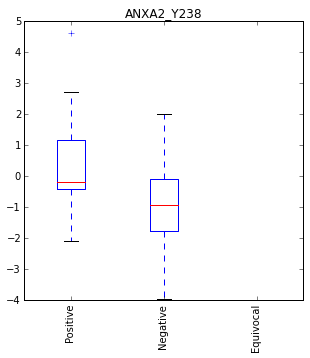

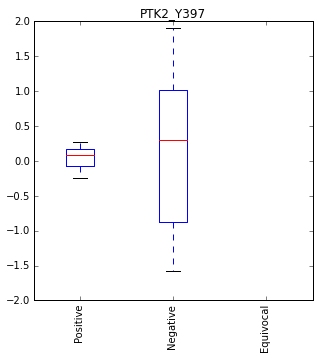

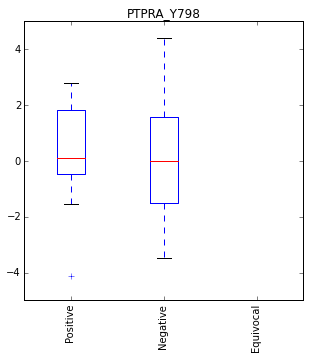

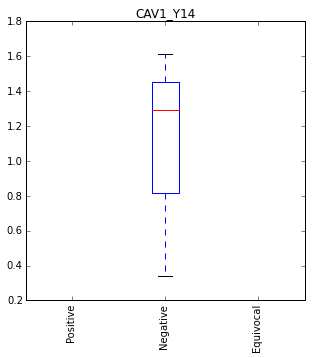

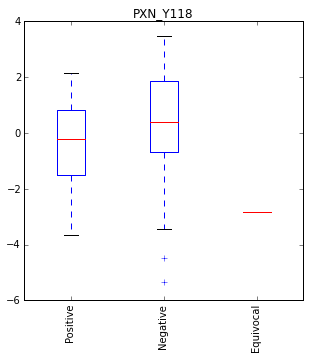

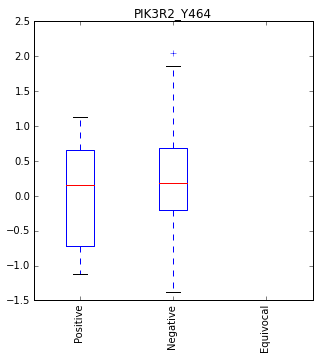

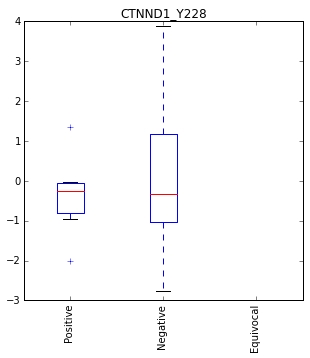

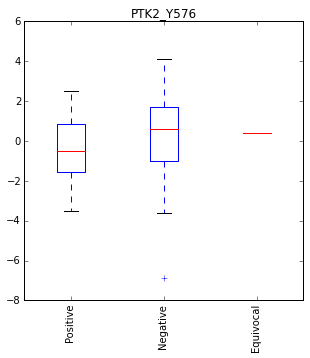

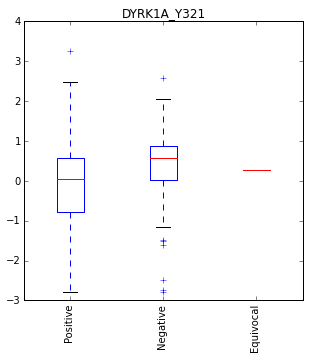

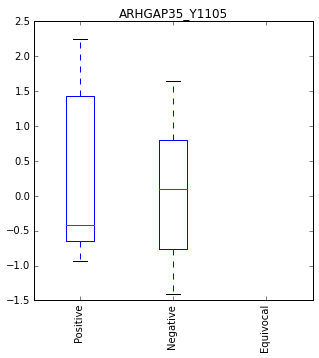

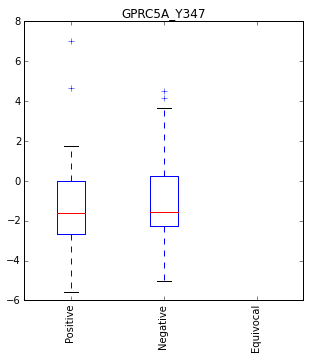

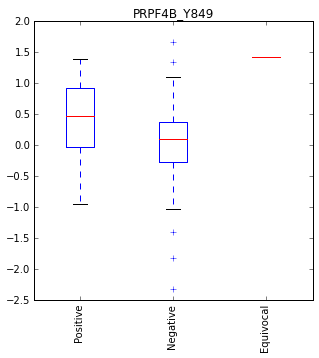

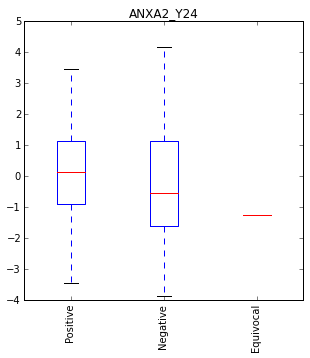

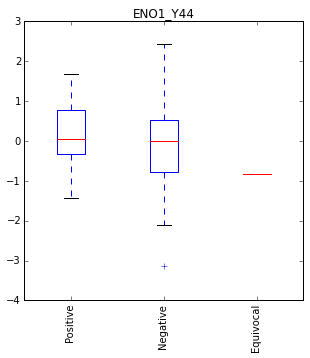

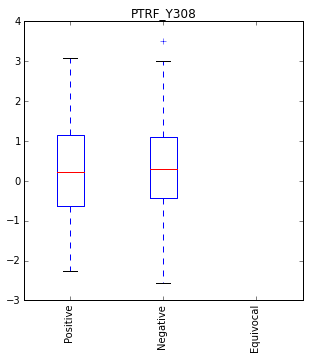

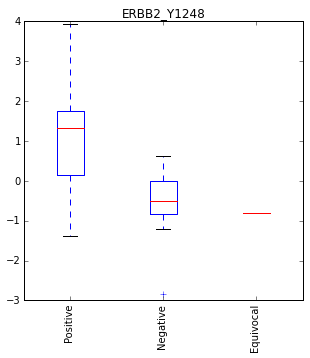

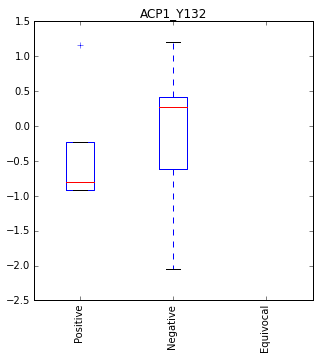

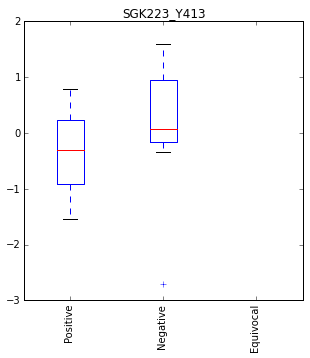

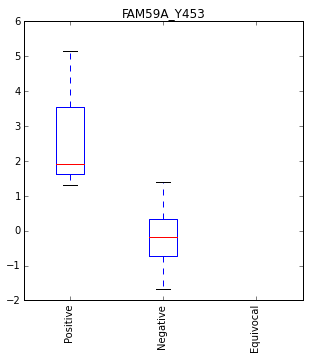

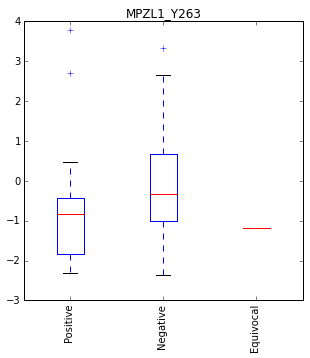

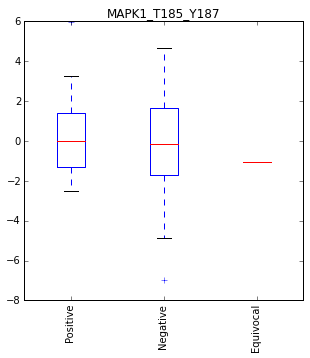

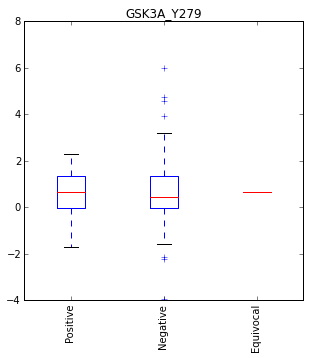

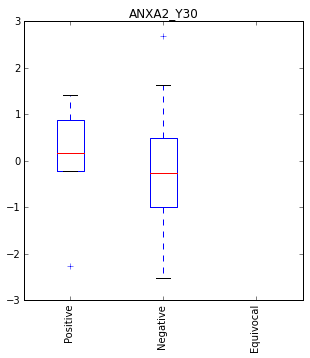

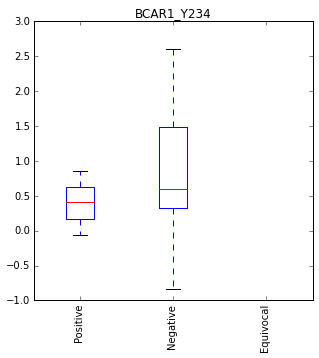

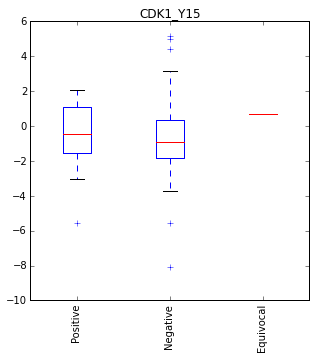

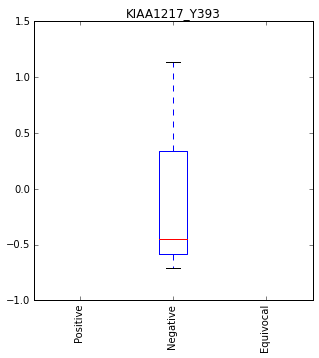

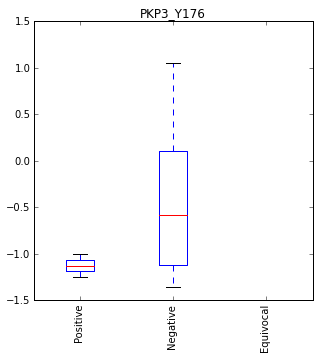

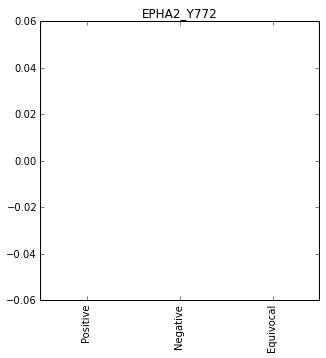

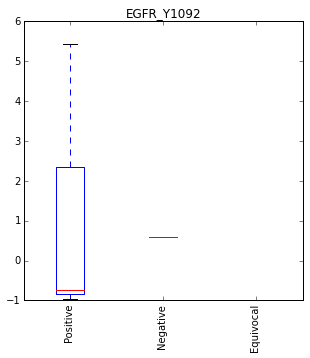

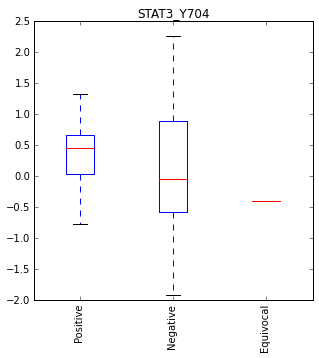

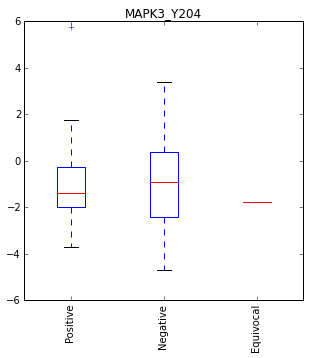

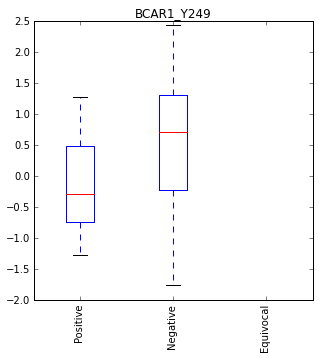

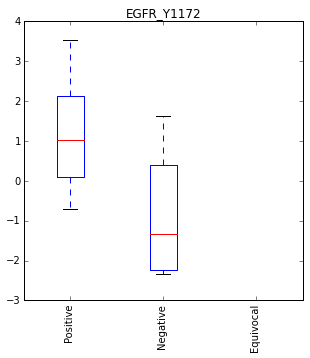

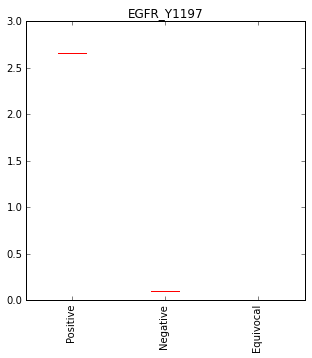

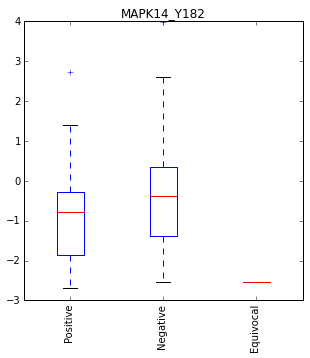

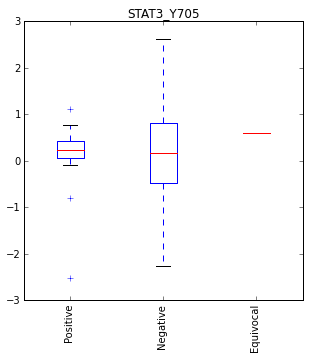

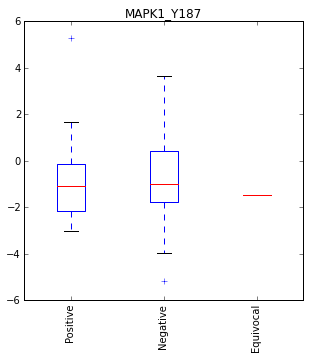

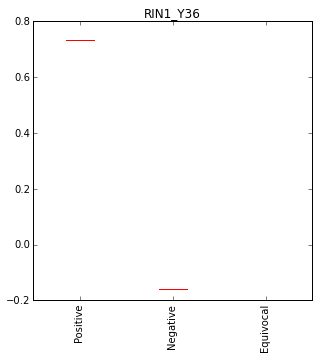

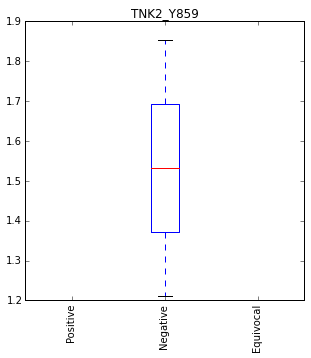

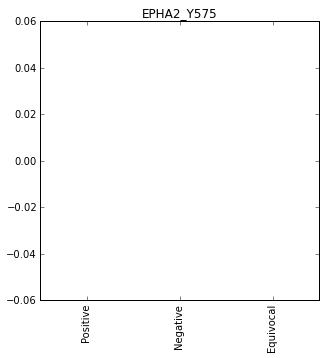

In [22]:
# walk through every site that can map between CPTAC and HER2OE set and plot the data
dfH = pd.DataFrame.from_csv('./data/sites_coOccDiff.csv', sep=',')
sites_with_data = []
arrayDict = {}
for site in dfH['Gene_site']:
    x = df[df['gene_site']== site]
    if not x.empty:
        sites_with_data.append(site)
        fig = plt.figure(figsize=(5,5))
        series = df[df['gene_site']==site][data_cols]
        #patientNumberDict, arrayDict[gene_site] = boxplot_forProtein_withSort(labelDict, classDict, label_array, series, gene_site)
        patientNumberDict, arrayDict[site] = boxplot_forProtein(labelDict, classDict, series, site, sort=classArray)
        plt.title(site)
        plt.show()


In [23]:
# For a two-class label system, like HER2 positive and HER2 negative, calculate the p-values by 
#t-test (one-sided for an increase in the positive group)
# Fisher's Exact test (one-sided for an enrichment in the positive group for having a measurement)

pvalue_ttest = {}
pvalue_fisher ={}

class1 = 'Positive'
class2 = 'Negative'


posPatients = patientNumberDict[class1]
negPatients = patientNumberDict[class2]
posPatientDict = {}
negPatientDict = {}
#for gene_site in arrayDict.keys():
for gene_site in sites_with_data:
    Positives = arrayDict[gene_site][class1]
    #other = np.concatenate([arrayDict[gene_site]['Negative'], arrayDict[gene_site]['Equivocal']], axis=0)
    Negatives = arrayDict[gene_site][class2]
    statistic, pvalue_ttest[gene_site] = stats.ttest_ind(Positives, Negatives, equal_var=False)
    posPatientsWithValue = len(Positives)
    negPatientsWithValue = len(Negatives)
    conTable = [[posPatientsWithValue, negPatientsWithValue], [posPatients, negPatients]]
    odds, pvalue_fisher[gene_site] = stats.fisher_exact(conTable, 'greater')
    posPatientDict[gene_site] = posPatientsWithValue
    negPatientDict[gene_site] = negPatientsWithValue

/Users/knaegle/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


In [24]:
# Print the pvalues
print "gene_site\t#posSamples \t #negSamples \t \tfisher_pvalue\tttest_pvalue\tCo-Occurrence Difference"
for gene_site in sites_with_data:
    if posPatientDict[gene_site]:
        proportion = float(negPatientDict[gene_site])/negPatients/float(posPatientDict[gene_site])/posPatients
    else:
        proportion = 0
        
    print "%s\t%d\t%d\t%0.2f\t%0.3f\t%1.3f"%(gene_site, posPatientDict[gene_site], negPatientDict[gene_site],
                                            pvalue_fisher[gene_site], pvalue_ttest[gene_site]/2,
                                            dfH[dfH['Gene_site']==gene_site]['co-occ diff']) #the t-test was two-sided, choose a one sided test


gene_site	#posSamples 	 #negSamples 	 	fisher_pvalue	ttest_pvalue	Co-Occurrence Difference
ANXA2_Y238	16	53	0.60	0.007	0.317
PTK2_Y397	3	6	0.39	0.423	0.309
PTPRA_Y798	16	52	0.59	0.412	0.248
CAV1_Y14	0	3	1.00	nan	0.239
PXN_Y118	16	51	0.57	0.076	0.218
PIK3R2_Y464	12	33	0.44	0.205	0.214
CTNND1_Y228	6	9	0.16	0.310	0.210
PTK2_Y576	17	56	0.60	0.122	0.208
DYRK1A_Y321	18	58	0.58	0.256	0.203
ARHGAP35_Y1105	6	16	0.46	0.380	0.202
GPRC5A_Y347	16	37	0.27	0.481	0.201
PRPF4B_Y849	18	58	0.58	0.027	0.199
ANXA2_Y24	14	43	0.53	0.196	0.196
ENO1_Y44	18	58	0.58	0.168	0.192
PTRF_Y308	12	37	0.54	0.401	0.185
ERBB2_Y1248	10	27	0.43	0.004	0.182
ACP1_Y132	4	8	0.35	0.363	0.175
SGK223_Y413	3	9	0.59	0.283	0.169
FAM59A_Y453	3	10	0.64	0.061	0.166
MPZL1_Y263	14	35	0.34	0.211	0.153
MAPK1_T185_Y187	17	56	0.60	0.269	0.152
GSK3A_Y279	17	55	0.58	0.416	0.152
ANXA2_Y30	8	27	0.63	0.243	0.150
BCAR1_Y234	3	18	0.89	0.121	0.149
CDK1_Y15	18	58	0.58	0.403	0.147
KIAA1217_Y393	0	3	1.00	nan	0.146
PKP3_Y176	2	6	0.61	0.062	0.141
EPHA2_Y7

## Correlations between pSites across patients
Since patient categories shows interesting results (like HER2 Y1248 variability with HER2 status), but correlation between CTNND1_Y228 and ERBB2_Y1248 based on staging, do a direct correlation of phosphorylation across patients (irrespective of patient categorical data

In [25]:
#gene_sites_of_interest = gene_sites_24H_CTNND1_cluster
gene_sites_of_interest = ['CTNND1_Y228', 'ERBB2_Y1248']
selectData = returnSelectedDataByGeneSite(df, gene_sites_of_interest, data_cols)


In [26]:
selectData.to_excel('cttnd1_erbb_data.xls') # cannot correlate the data, almost no patients have both, so have to group by patient type